Found 822 files belonging to 3 classes.
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9283 - loss: 0.3572 - recall_2: 0.9079
Loss on test dataset: 0.4893989562988281
Accuracy on test dataset: 0.8503649830818176
Recall on test dataset: 0.8321167826652527
206/206 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step


2024-07-08 11:26:42.259080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


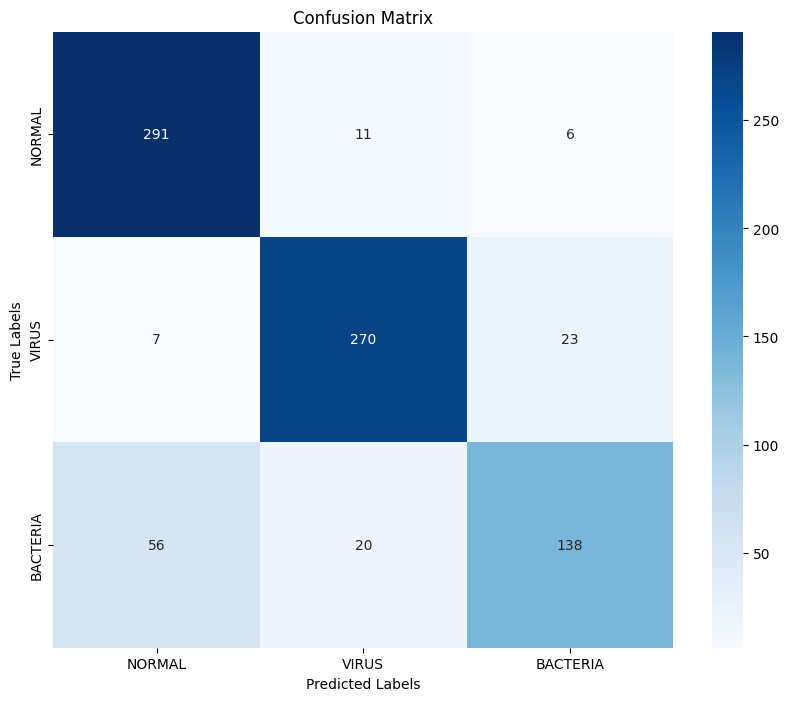

              precision    recall  f1-score   support

      NORMAL       0.82      0.94      0.88       308
       VIRUS       0.90      0.90      0.90       300
    BACTERIA       0.83      0.64      0.72       214

    accuracy                           0.85       822
   macro avg       0.85      0.83      0.83       822
weighted avg       0.85      0.85      0.85       822



In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from pathlib import Path

# Définir les paramètres et les chemins
IMG_SIZE = (224, 224)
BATCH_SIZE = 4
CWD = Path.cwd()
NEW_TEST = CWD / "sorted_data" / "test"
class_names = {0: 'NORMAL', 1: 'VIRUS', 2: 'BACTERIA'}

# Charger le jeu de test
test_dataset = image_dataset_from_directory(
    directory=NEW_TEST,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False
)

# Appliquer le prétraitement spécifique à VGG16
def preprocess(image, label):
    return preprocess_input(image), label

test_dataset = test_dataset.map(preprocess)

AUTOTUNE = tf.data.AUTOTUNE
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Charger le modèle enregistré
model = load_model("8_modele_final_fine_tuning_40_updated1_w_params_best.keras")

# Évaluer les performances sur le jeu de test
test_loss, test_accuracy, test_recall = model.evaluate(test_dataset)
print(f"Loss on test dataset: {test_loss}")
print(f"Accuracy on test dataset: {test_accuracy}")
print(f"Recall on test dataset: {test_recall}")

# Obtenir les prédictions du modèle
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Obtenir les vraies étiquettes
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(true_labels, predicted_labels)

# Tracer la heatmap de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Afficher le rapport de classification
print(classification_report(true_labels, predicted_labels, target_names=list(class_names.values())))
